<a href="https://colab.research.google.com/github/darior105/Klimatske_Promene/blob/main/klimatske_promene_projekat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files

In [7]:
podaci=files.upload()

Saving tg_ens_mean_0.1deg_BG_reg_v29.0e.txt to tg_ens_mean_0.1deg_BG_reg_v29.0e.txt


In [8]:
import numpy as np
import pandas as pd

file=pd.read_csv('tg_ens_mean_0.1deg_BG_reg_v29.0e.txt', delim_whitespace=True, skiprows=1, header=None, names=['year', 'month', 'day', 'temperature'])

print(file)

       year  month  day  temperature
0      1950      1    1        -3.41
1      1950      1    2        -2.58
2      1950      1    3         0.63
3      1950      1    4         1.34
4      1950      1    5        -0.57
...     ...    ...  ...          ...
27023  2023     12   27         9.12
27024  2023     12   28         7.96
27025  2023     12   29         9.22
27026  2023     12   30        11.25
27027  2023     12   31        10.21

[27028 rows x 4 columns]


In [9]:
year_avg=file.groupby('year')['temperature'].mean().reset_index()
print(year_avg)

    year  temperature
0   1950    13.419753
1   1951    13.297178
2   1952    12.961967
3   1953    11.875589
4   1954    11.008575
..   ...          ...
69  2019    14.968849
70  2020    14.222158
71  2021    13.743096
72  2022    14.838301
73  2023    15.336000

[74 rows x 2 columns]


In [10]:
year_avg.columns = ['year', 'year_avg_temp']


In [11]:
file = pd.merge(file, year_avg, on='year')

In [12]:
month_avg = file.groupby(['year', 'month'])['temperature'].mean().reset_index()
month_avg.columns = ['year', 'month', 'month_avg_temp']
print(month_avg)

     year  month  month_avg_temp
0    1950      1       -2.089355
1    1950      2        3.534286
2    1950      3        7.948387
3    1950      4       14.789667
4    1950      5       19.310968
..    ...    ...             ...
883  2023      8       24.870968
884  2023      9       22.996667
885  2023     10       18.465161
886  2023     11       10.192000
887  2023     12        7.142903

[888 rows x 3 columns]


In [13]:
file = pd.merge(file, month_avg, on=['year', 'month'])

In [14]:
file['anomaly'] = file['month_avg_temp'] - file['year_avg_temp']

In [15]:
print(file)

       year  month  day  temperature  year_avg_temp  month_avg_temp    anomaly
0      1950      1    1        -3.41      13.419753       -2.089355 -15.509108
1      1950      1    2        -2.58      13.419753       -2.089355 -15.509108
2      1950      1    3         0.63      13.419753       -2.089355 -15.509108
3      1950      1    4         1.34      13.419753       -2.089355 -15.509108
4      1950      1    5        -0.57      13.419753       -2.089355 -15.509108
...     ...    ...  ...          ...            ...             ...        ...
27023  2023     12   27         9.12      15.336000        7.142903  -8.193097
27024  2023     12   28         7.96      15.336000        7.142903  -8.193097
27025  2023     12   29         9.22      15.336000        7.142903  -8.193097
27026  2023     12   30        11.25      15.336000        7.142903  -8.193097
27027  2023     12   31        10.21      15.336000        7.142903  -8.193097

[27028 rows x 7 columns]


In [16]:
import matplotlib.pyplot as plt
import seaborn as sn

In [17]:
years = file['year'].unique()

In [18]:
cmap = sn.color_palette("coolwarm", as_cmap=True)

In [19]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

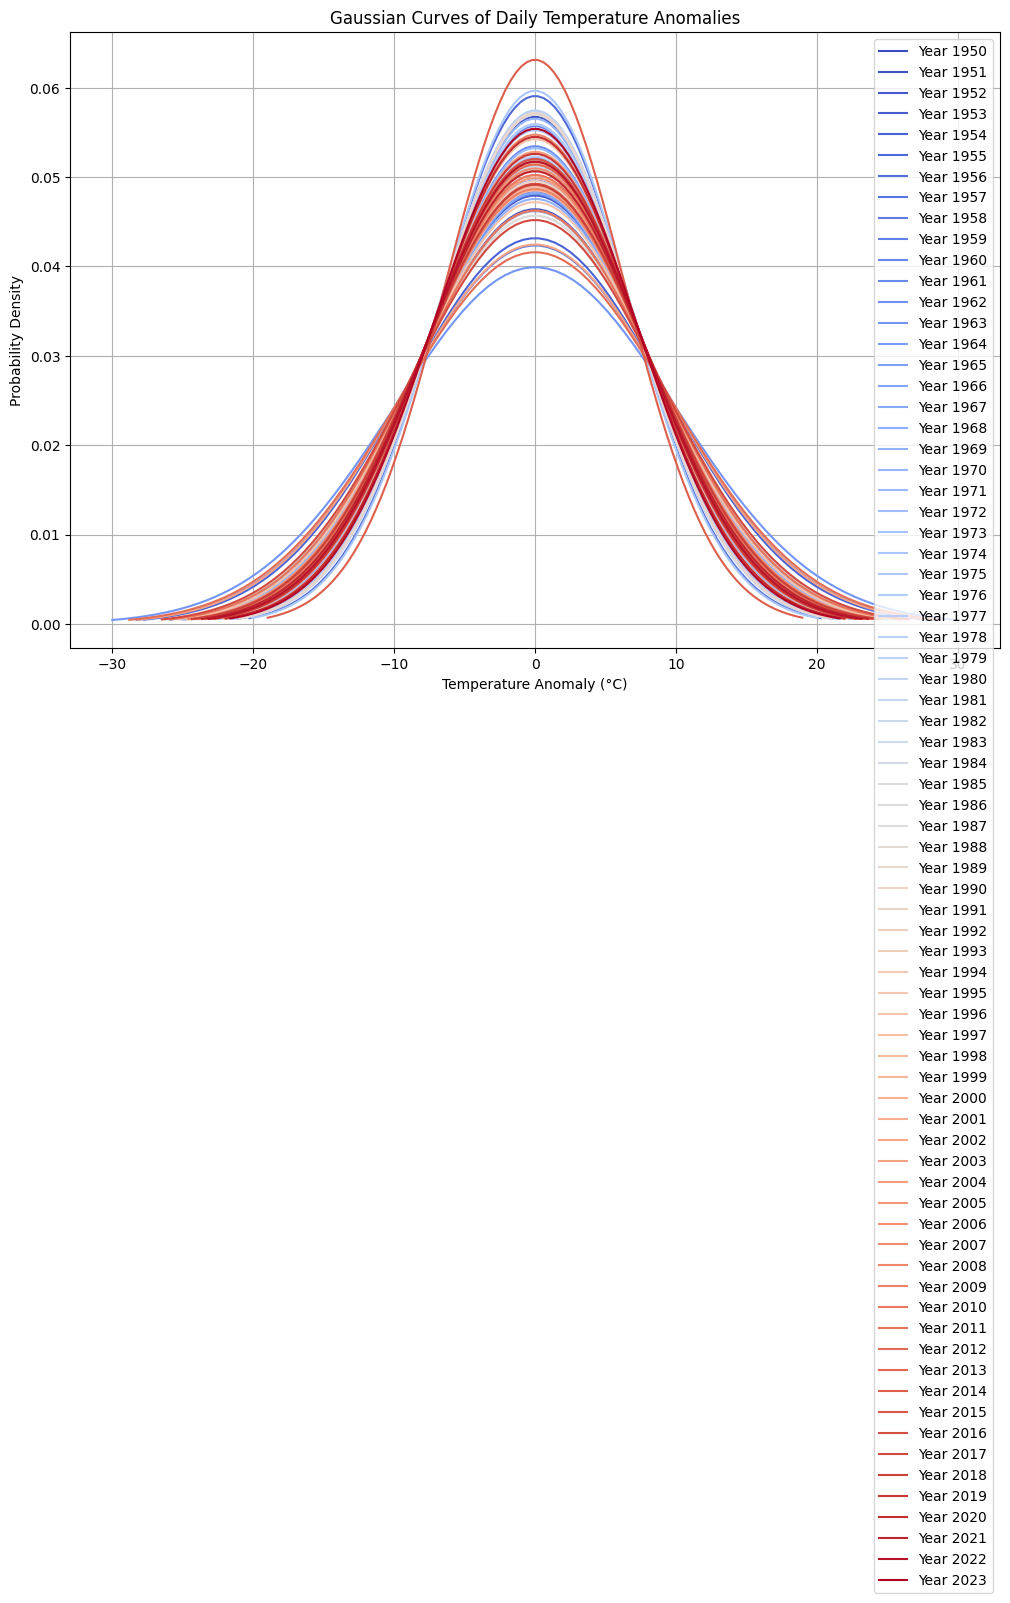

In [25]:
plt.figure(figsize=(12, 8))

from scipy.stats import norm

# Iterate through each year and plot the Gaussian fit for daily anomalies
for year in years:
    daily_data = file[file['year'] == year]['anomaly']

    # Fit a Gaussian to the daily anomalies
    mu, std = norm.fit(daily_data)  # Mean and standard deviation

    # Create a range of x values for the plot
    x = np.linspace(mu - 3*std, mu + 3*std, 100)
    p = norm.pdf(x, mu, std)  # Calculate the probability density function

    # Plotting the Gaussian curve
    plt.plot(x, p, label=f'Year {year}', color=cmap((year - years.min()) / (years.max() - years.min())))

# Step 5: Customizing the plot
plt.title('Gaussian Curves of Daily Temperature Anomalies')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

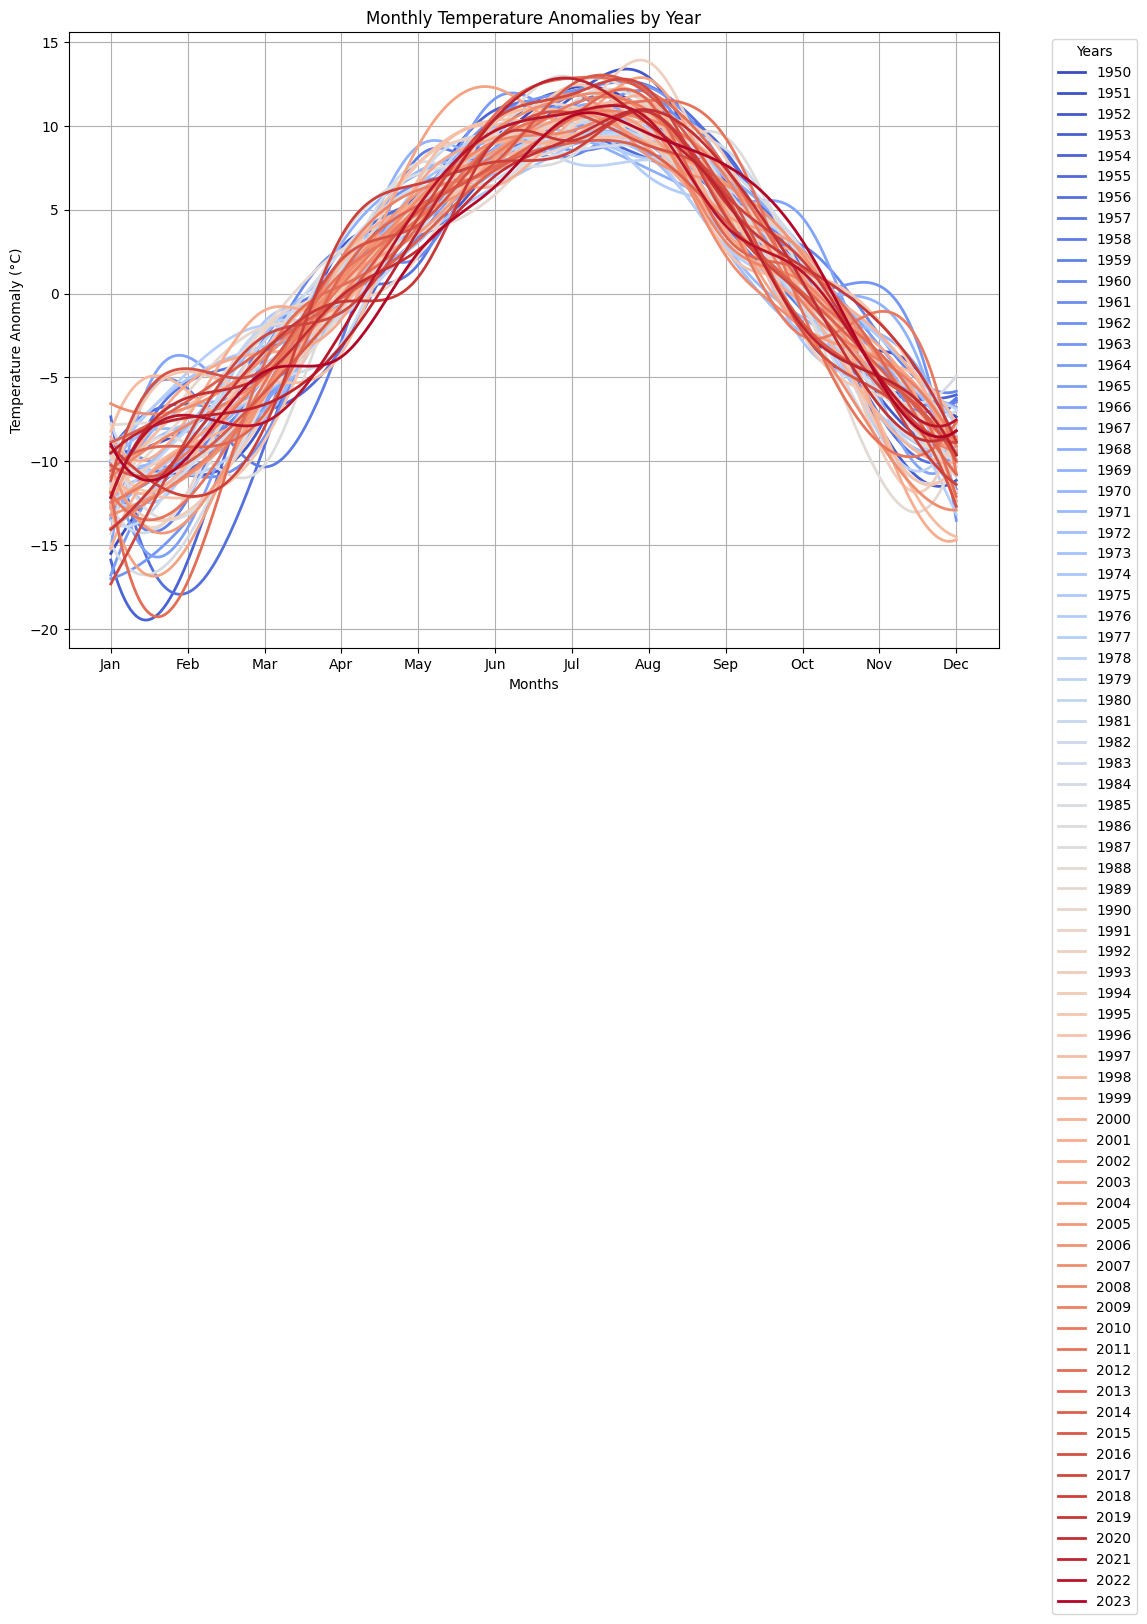

In [32]:
from scipy.interpolate import make_interp_spline


plt.figure(figsize=(12, 8))

years = sorted(file['year'].unique())
cmap = plt.get_cmap('coolwarm', len(years))

for i, year in enumerate(years):

    yearly_anomalies = file[file['year'] == year].groupby('month')['anomaly'].mean().reset_index()

    x_values = yearly_anomalies['month'].values
    y_values = yearly_anomalies['anomaly'].values

    spline = make_interp_spline(x_values, y_values, k=3)

    x_smooth = np.linspace(x_values.min(), x_values.max(), 300)
    y_smooth = spline(x_smooth)

    plt.plot(x_smooth, y_smooth, label=str(year), color=cmap(i), linewidth=2)

plt.title('Monthly Temperature Anomalies by Year')
plt.xlabel('Months')
plt.ylabel('Temperature Anomaly (°C)')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Years', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

